In [2]:
import cv2
import tensorflow as tf
from numpy import load
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
import numpy as np 
import matplotlib.pyplot as plt 
import random
from numpy import savez_compressed
import time
from keras.models import load_model
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import expand_dims

In [2]:
# DIR1 = "S:/projects/dataset/intel image/seg_train/seg_train"
# DIR2 = "S:/projects/dataset/intel image/seg_test/seg_test"
# CATEGORIES = ['buildings','forest','glacier', 'mountain', 'sea', 'street']
# for category in CATEGORIES:
#     print(category)
#     path = os.path.join(DIR1, category)
#     for img in os.listdir(path):
#         img_array = cv2.cvtColor(cv2.imread(os.path.join(path, img)),cv2.COLOR_BGR2RGB)
        
#         plt.imshow(img_array)
#         plt.show()
#         break
# size = img_array.shape[0]
# print(size)


In [3]:
# dataset = {k:[] for k in CATEGORIES}


# def create_sets():
    
#     for category in CATEGORIES:
#         path = os.path.join(DIR1, category)
#         path2 = os.path.join(DIR2, category)
#         # class_num = CATEGORIES.index(category)
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.cvtColor(cv2.imread(os.path.join(path, img)),cv2.COLOR_BGR2RGB)
#                 new_array = cv2.resize(img_array,(150, 150))
#                 dataset[category].append(new_array)
#             except Exception as e:
#                 pass
#         for img2 in os.listdir(path2):
#             try:
#                 img_array2 = cv2.cvtColor(cv2.imread(os.path.join(path, img)),cv2.COLOR_BGR2RGB)
#                 new_array2 = cv2.resize(img_array2,(150, 150))
#                 dataset[category].append(new_array2)
#             except Exception as e:
#                 pass


# create_sets()

In [4]:
# buildings = dataset['buildings']
# forest = dataset['forest']
# glacier = dataset['glacier']
# mountain = dataset['mountain']
# sea = dataset['sea']
# street = dataset['street']



In [5]:
# def bw(dataset):
#     random.shuffle(dataset)
#     for i in dataset[:7200]:
#         onechannel = cv2.cvtColor(i,cv2.COLOR_RGB2GRAY)
#         threechannel = cv2.cvtColor(onechannel, cv2.COLOR_GRAY2RGB)
#         setgray.append(threechannel)
#     for j in dataset[7201:]:
#         setcolor.append(j)

In [6]:
# len(dataset['buildings'])

In [7]:
# setcolor=[]
# setgray =[]
# # for category in CATEGORIES:
# #     for i in dataset[:7200]:
# #         setcolor.append(i) 
# #     for img in dataset[7200:14401]:
# #         onechannel = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# #         threechannel = cv2.cvtColor(onechannel, cv2.COLOR_GRAY2RGB)
# #         setgray.append(threechannel)
# bw(buildings)
# bw(forest)
# bw(glacier)
# bw(mountain)
# bw(sea)
# bw(street)
# setcolor = np.asarray(setcolor)
# setgray = np.asarray(setgray)
# random.shuffle(setcolor, random.seed())
# random.shuffle(setgray, random.seed())
# print(len(setcolor)+len(setgray))

In [8]:
# a = setgray[3]

# plt.imshow(a)
# print(a.shape)



In [9]:
# print(setcolor.shape, setgray.shape)

In [10]:
# # save as compressed numpy array
# filename = 'colourise_1501.npz'
# # savez_compressed(filename, setgray, setcolor)
# print('Saved dataset: ', filename)

In [11]:
# # # load and plot the prepared dataset
# # from numpy import load
# # from matplotlib import pyplot
# # load the dataset
# data = load('colourise_150.npz')
# dataA, dataB = data['arr_0'], data['arr_1']
# print('Loaded: ', dataA.shape, dataB.shape)
# # plot source images
# n_samples = 3
# for i in range(n_samples):
#     plt.subplot(2, n_samples, 1 + i)
#     plt.axis('off')
#     squeezed = dataA[i].squeeze()
#     plt.imshow(squeezed.astype('uint8'), cmap='gray')
# # plot target image
# for i in range(n_samples):
# 	plt.subplot(2, n_samples, 1 + n_samples + i)
# 	plt.axis('off')
# 	plt.imshow(dataB[i].astype('uint8'))
# plt.show()

In [12]:
# # define the discriminator model
# def define_discriminator(image_shape):
# 	# weight initialization
# 	init = RandomNormal(stddev=0.02)
# 	# source image input
# 	in_image = Input(shape=image_shape)
# 	# C64
# 	d = Conv2D(16, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
# 	d = LeakyReLU(alpha=0.2)(d)
# 	# C128
# 	# d = Conv2D(32, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
# 	# d = InstanceNormalization(axis=-1)(d)
# 	# d = LeakyReLU(alpha=0.2)(d)
# 	# C256
# 	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
# 	d = InstanceNormalization(axis=-1)(d)
# 	d = LeakyReLU(alpha=0.2)(d)
# 	# C512
# 	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
# 	d = InstanceNormalization(axis=-1)(d)
# 	d = LeakyReLU(alpha=0.2)(d)
# 	# second last output layer
# 	d = Conv2D(128, (4,4), padding='same', kernel_initializer=init)(d)
# 	d = InstanceNormalization(axis=-1)(d)
# 	d = LeakyReLU(alpha=0.2)(d)
# 	# patch output
# 	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
# 	# define model
# 	model = Model(in_image, patch_out)
# 	# compile model
# 	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
# 	return model

In [13]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	# d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	# d = InstanceNormalization(axis=-1)(d)
	# d = LeakyReLU(alpha=0.2)(d)
	# # # C512
	# d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	# d = InstanceNormalization(axis=-1)(d)
	# d = LeakyReLU(alpha=0.2)(d)
	# # second last output layer
	d = Conv2D(128, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

In [14]:
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

In [15]:
# def define_generator(image_shape, n_resnet=6):
# 	# weight initialization
# 	init = RandomNormal(stddev=0.02)
# 	# image input
# 	in_image = Input(shape=image_shape)
# 	# c7s1-64
# 	g = Conv2D(32, (6,6), padding='same', kernel_initializer=init)(in_image)
# 	g = InstanceNormalization(axis=-1)(g)
# 	g = Activation('relu')(g)
# 	# d128
# 	# g = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
# 	# g = InstanceNormalization(axis=-1)(g)
# 	# g = Activation('relu')(g)
# 	# d256
# 	g = Conv2D(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
# 	g = InstanceNormalization(axis=-1)(g)
# 	g = Activation('relu')(g)
# 	# R256
# 	for _ in range(n_resnet):
# 		g = resnet_block(64, g)
# 	# u128
# 	g = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(g)
# 	g = InstanceNormalization(axis=-1)(g)
# 	g = Activation('relu')(g)
# 	# u64
# 	g = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(g)
# 	g = InstanceNormalization(axis=-1)(g)
# 	g = Activation('relu')(g)
# 	# c7s1-3
# 	g = Conv2D(3, (6,6), padding='same', kernel_initializer=init)(g)
# 	g = InstanceNormalization(axis=-1)(g)
# 	out_image = Activation('tanh')(g)
# 	# define model
# 	model = Model(in_image, out_image)
# 	return model

In [16]:
# define the standalone generator model
def define_generator(image_shape, n_resnet=7):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (6,6), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# # d256
	# g = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(g)
	# g = InstanceNormalization(axis=-1)(g)
	# g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(128, g)
	# u128
	g = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	# g = Conv2DTranspose(32, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(g)
	# g = InstanceNormalization(axis=-1)(g)
	# g = Activation('relu')(g)
	# # u64
	# g = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(g)
	# g = InstanceNormalization(axis=-1)(g)
	# g = Activation('relu')(g)	
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [17]:
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

In [18]:
# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [19]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

In [20]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [21]:
# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = 'g_model_graytocolor_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = 'g_model_colortogray_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [22]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images	
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_in[i], cmap='gray')
	# plot translated image
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_out[i])
	# save plot to file
	filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
	plt.savefig(filename1)
	plt.close()

In [23]:
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random.random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

In [24]:
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, = 10, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	t = time.process_time()
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d/%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]  (%d batches)' % (i+1, n_steps, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2, n_batch))
		# evaluate the model performance every so often
		if (i+1) % (bat_per_epo * 1) == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i+1) % (bat_per_epo * 2) == 0:
			# save the models
			save_models(i, g_model_AtoB, g_model_BtoA)
	elapsed= time.process_time() - t
	print('Time elapsed:%0.3f' %(elapsed))

In [25]:
# dataset = load_real_samples('colourise_150.npz')
# trainA, trainB = dataset
# X_realA, y_realA = generate_real_samples(trainA, 1, 0)
# X_realB, y_realB = generate_real_samples(trainB, 1, 0)
# print(X_realA.shape, X_realB.shape)

In [26]:
# dataset = load_real_samples('colourise_150.npz')
# print('Loaded', dataset[0].shape, dataset[1].shape)
# # define input shape based on the loaded dataset
# image_shape= dataset[0].shape[1:]
# print(image_shape)

In [27]:
# load image data
dataset = load_real_samples('colourise_150.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape= dataset[0].shape[1:]

MemoryError: Unable to allocate 4.28 GiB for an array with shape (8519, 150, 150, 3) and data type float64

In [ ]:



# generator: gray -> color
print('Checkpoint 1')
g_model_graytocolor = define_generator(image_shape)
# generator: color -> gray
print('Checkpoint 2')
g_model_colortogray = define_generator(image_shape)
# discriminator: gray -> [real/fake]
print('Checkpoint 3')
d_model_gray = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
print('Checkpoint 4')
d_model_color = define_discriminator(image_shape)
# composite: gray -> color -> [real/fake, gray]
print('Checkpoint 5')
c_model_graytocolor = define_composite_model(g_model_graytocolor, d_model_color, g_model_colortogray, image_shape)
# composite: color -> gray -> [real/fake, color]
print('Checkpoint 6')
c_model_colortogray = define_composite_model(g_model_colortogray, d_model_gray, g_model_graytocolor, image_shape)
# train models
print('Checkpoint 7')


In [16]:
train(d_model_gray, d_model_color, g_model_graytocolor, g_model_colortogray, c_model_graytocolor, c_model_colortogray, dataset)

84] g[1.748,2.330]
>69825/70150, dA[0.030,0.013] dB[0.200,0.037] g[1.950,2.444]
>69826/70150, dA[0.039,0.021] dB[0.092,0.041] g[1.596,1.903]
>69827/70150, dA[0.016,0.014] dB[0.063,0.032] g[2.907,3.387]
>69828/70150, dA[0.025,0.010] dB[0.011,0.019] g[1.919,1.913]
>69829/70150, dA[0.011,0.012] dB[0.100,0.085] g[2.289,2.686]
>69830/70150, dA[0.023,0.052] dB[0.018,0.028] g[1.403,1.527]
>69831/70150, dA[0.029,0.026] dB[0.014,0.020] g[3.062,3.584]
>69832/70150, dA[0.034,0.010] dB[0.015,0.010] g[2.913,2.818]
>69833/70150, dA[0.011,0.019] dB[0.007,0.074] g[2.168,2.910]
>69834/70150, dA[0.019,0.014] dB[0.380,0.018] g[2.124,2.684]
>69835/70150, dA[0.013,0.021] dB[0.028,0.206] g[1.760,2.559]
>69836/70150, dA[0.013,0.013] dB[0.018,0.085] g[2.404,2.889]
>69837/70150, dA[0.072,0.021] dB[0.139,0.015] g[1.843,2.175]
>69838/70150, dA[0.117,0.050] dB[0.195,0.059] g[1.409,1.602]
>69839/70150, dA[0.006,0.026] dB[0.064,0.068] g[3.253,4.124]
>69840/70150, dA[0.082,0.026] dB[0.025,0.032] g[2.218,2.098]
>6984

In [5]:
# load dataset
A_data, B_data = load_real_samples('colourise_150.npz')
print('Loaded', A_data.shape, B_data.shape)

Loaded (7015, 150, 150, 3) (7018, 150, 150, 3)


In [86]:
# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_BtoA = load_model('g_model_colortogray_042090.h5', cust)
model_AtoB = load_model('g_model_graytocolor_042090.h5', cust)

In [87]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	
	X = dataset[ix]
	return X

In [88]:
# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)

In [89]:
# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		plt.subplot(1, len(images), 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(images[i])
		# title
		plt.title(titles[i])
	plt.show()

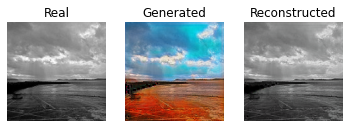

In [90]:
show_plot(A_real, B_generated, A_reconstructed)

In [3]:
def load_image(filename, size=(150,150)):
    # load and resize the image
    pixels = cv2.imread(filename)
    pixels = cv2.resize(pixels,dsize=size)
    image_srcnew = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)
    onechannel = cv2.cvtColor(image_srcnew,cv2.COLOR_RGB2GRAY)
    threechannel = cv2.cvtColor(onechannel, cv2.COLOR_GRAY2RGB)
	# convert to numpy array
    pixels = np.array(threechannel)
	# transform in a sample
    pixels = expand_dims(pixels, 0)
	# scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    return pixels

In [4]:
# load the image #5,182,388,661,667,754,841,1141,1255,2532,2986,3013,1785,2081,2146,888,913,1037
# Our generator models used a custom layer from the keras_contrib library, specifically the InstanceNormalization layer. Therefore, we need to specify how to load this layer when loading each generator model.
image_src = load_image('D:/projects/dataset/intel image/seg_pred/seg_pred/388.jpg')

cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_graytocolor_042090.h5', cust)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


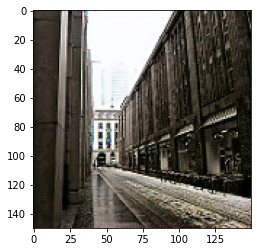

In [19]:

# translate image
image_tar = model_AtoB.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated image
plt.imshow(image_tar[0])
plt.show()